# Regression

In [4]:
import torch
import torch.utils.data as data_utils

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

## Loading dataset

In [5]:
diamonds_data = pd.read_csv('datasets/diamonds.csv', index_col=0)

diamonds_data.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [6]:
diamonds_data.shape

(53940, 10)

In [7]:
diamonds_data = diamonds_data.sample(5000, replace=False)

In [8]:
diamonds_data['cut'].value_counts()

Ideal        2019
Premium      1274
Very Good    1110
Good          436
Fair          161
Name: cut, dtype: int64

In [9]:
diamonds_data['color'].value_counts()

G    1057
F     884
E     874
H     780
D     627
I     513
J     265
Name: color, dtype: int64

In [10]:
diamonds_data['clarity'].value_counts()

SI1     1178
VS2     1140
SI2      874
VS1      759
VVS2     473
VVS1     346
IF       169
I1        61
Name: clarity, dtype: int64

In [11]:
diamonds_data.describe()

,carat,depth,table,price,x,y,z
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.795696,61.762480,57.481260,3882.636400,5.725778,5.727192,3.540418
std,0.476678,1.422017,2.233244,3935.768059,1.117880,1.109586,0.800370
min,0.200000,54.000000,52.000000,351.000000,3.730000,3.680000,0.000000
25%,0.400000,61.100000,56.000000,949.000000,4.717500,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2406.500000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5299.500000,6.540000,6.540000,4.030000
max,5.010000,78.200000,69.000000,18804.000000,10.740000,10.540000,31.800000


### Visualizing Relationships 

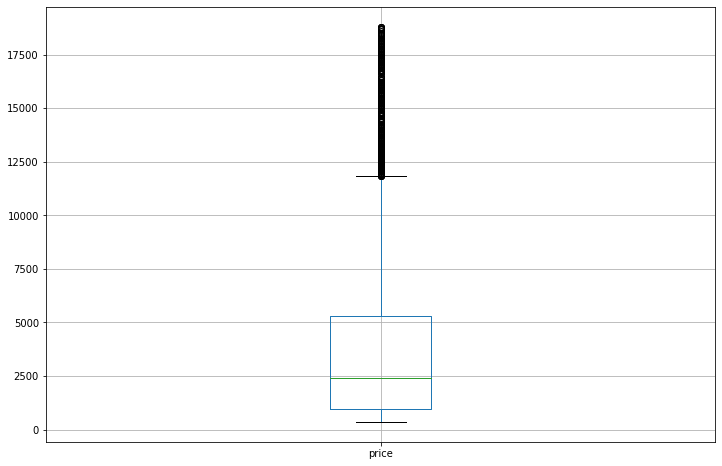

In [12]:
plt.figure(figsize=(12, 8 ))

diamonds_data.boxplot('price')

plt.show()

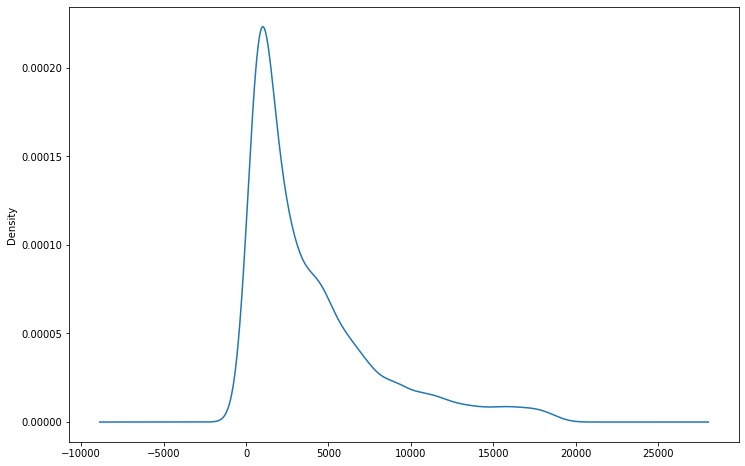

In [13]:
plt.figure(figsize=(12, 8))

diamonds_data['price'].plot.kde()

plt.show()

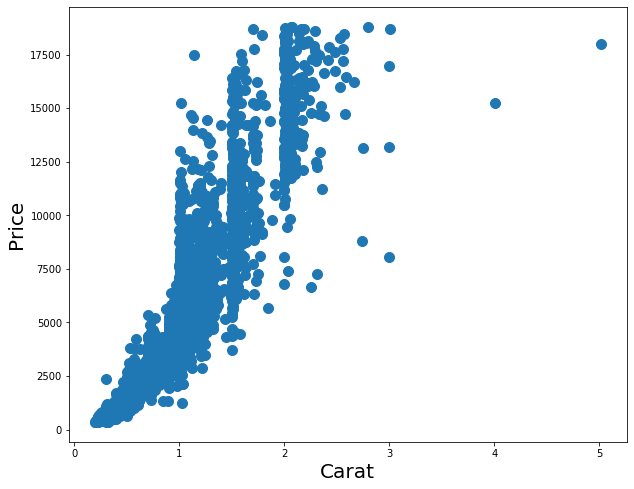

In [14]:
plt.figure(figsize=(10, 8))

plt.scatter(diamonds_data['carat'], diamonds_data['price'], s=100)

plt.xlabel('Carat', fontsize=20)
plt.ylabel('Price', fontsize=20)

plt.show()

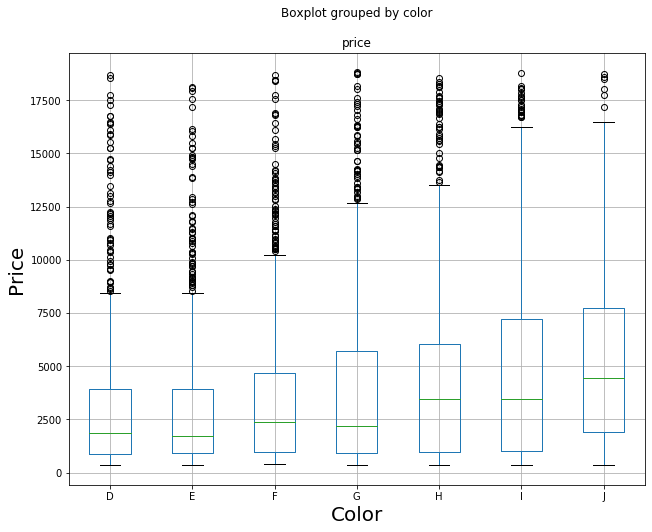

In [15]:
diamonds_data.boxplot('price', 'color', figsize=(10, 8))

plt.xlabel('Color', fontsize=20)
plt.ylabel('Price', fontsize=20)

plt.show()

In [16]:
diamonds_data_corr = diamonds_data.corr()

diamonds_data_corr

,carat,depth,table,price,x,y,z
carat,1.000000,0.037915,0.198259,0.922516,0.975342,0.974557,0.831966
depth,0.037915,1.000000,-0.287789,-0.006550,-0.020935,-0.024386,0.086578
table,0.198259,-0.287789,1.000000,0.148751,0.211267,0.204839,0.139556
price,0.922516,-0.006550,0.148751,1.000000,0.889504,0.891417,0.755136
x,0.975342,-0.020935,0.211267,0.889504,1.000000,0.998922,0.848243
y,0.974557,-0.024386,0.204839,0.891417,0.998922,1.000000,0.847981
z,0.831966,0.086578,0.139556,0.755136,0.848243,0.847981,1.000000


In [17]:
features = diamonds_data.drop('price', axis=1)

target = diamonds_data[['price']]

In [18]:
features.head()

,carat,cut,color,clarity,depth,table,x,y,z
8318,0.90,Ideal,F,SI1,62.2,55.0,6.16,6.21,3.85
18597,1.12,Premium,D,VS2,63.0,57.0,6.62,6.55,4.15
8696,1.00,Ideal,H,SI2,61.5,55.6,6.41,6.48,3.96
45468,0.50,Premium,E,VS2,62.6,58.0,5.12,5.07,3.19
4561,0.93,Very Good,G,SI2,60.8,62.0,6.29,6.34,3.84


In [19]:
categorical_features = features[['color', 'cut', 'clarity']]

categorical_features.head()

,color,cut,clarity
8318,F,Ideal,SI1
18597,D,Premium,VS2
8696,H,Ideal,SI2
45468,E,Premium,VS2
4561,G,Very Good,SI2


In [20]:
numeric_features = features.drop(['color', 'cut', 'clarity'], axis=1)

numeric_features.head()

,carat,depth,table,x,y,z
8318,0.90,62.2,55.0,6.16,6.21,3.85
18597,1.12,63.0,57.0,6.62,6.55,4.15
8696,1.00,61.5,55.6,6.41,6.48,3.96
45468,0.50,62.6,58.0,5.12,5.07,3.19
4561,0.93,60.8,62.0,6.29,6.34,3.84


### Performing label and one hot encoding for categorical columns

In [21]:
categorical_features['color'].unique()

array(['F', 'D', 'H', 'E', 'G', 'J', 'I'], dtype=object)

In [22]:
categorical_features['cut'].unique()

array(['Ideal', 'Premium', 'Very Good', 'Fair', 'Good'], dtype=object)

In [23]:
categorical_features['clarity'].unique()

array(['SI1', 'VS2', 'SI2', 'VVS2', 'IF', 'VS1', 'I1', 'VVS1'],
      dtype=object)

In [24]:
color_dict = {'D':0, 'E':1, 'F':2, 'G':3, 'H':4, 'I':5, 'J':6}

categorical_features['color'].replace(color_dict, inplace=True)

categorical_features.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,color,cut,clarity
8318,2,Ideal,SI1
18597,0,Premium,VS2
8696,4,Ideal,SI2
45468,1,Premium,VS2
4561,3,Very Good,SI2


In [25]:
cut_dict = {'Fair':0, 'Good':1, 'Very Good':2, 'Premium':3, 'Ideal':4}

categorical_features['cut'].replace(cut_dict, inplace=True)

categorical_features.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,color,cut,clarity
8318,2,4,SI1
18597,0,3,VS2
8696,4,4,SI2
45468,1,3,VS2
4561,3,2,SI2


In [26]:
clarity_dict = {'I1':0, 'SI2':1, 'SI1':2, 'VS2':3, 'VS1':4, 'VVS2':5, 'VVS1':6, 'IF':7}

categorical_features['clarity'].replace(clarity_dict, inplace=True)

categorical_features.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,color,cut,clarity
8318,2,4,2
18597,0,3,3
8696,4,4,1
45468,1,3,3
4561,3,2,1


In [27]:
numeric_features.describe()

,carat,depth,table,x,y,z
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.795696,61.762480,57.481260,5.725778,5.727192,3.540418
std,0.476678,1.422017,2.233244,1.117880,1.109586,0.800370
min,0.200000,54.000000,52.000000,3.730000,3.680000,0.000000
25%,0.400000,61.100000,56.000000,4.717500,4.720000,2.910000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.030000
max,5.010000,78.200000,69.000000,10.740000,10.540000,31.800000


In [28]:
standardScaler = StandardScaler()

numeric_features = pd.DataFrame(standardScaler.fit_transform(numeric_features),
                                columns=numeric_features.columns,
                                index=numeric_features.index)

numeric_features.describe()

,carat,depth,table,x,y,z
count,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03
mean,1.775469e-16,-2.575007e-15,-2.641609e-15,-1.611156e-16,2.645439e-16,1.711520e-16
std,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00
min,-1.249806e+00,-5.459327e+00,-2.454639e+00,-1.785502e+00,-1.845190e+00,-4.423917e+00
25%,-8.301941e-01,-4.659200e-01,-6.633435e-01,-9.020453e-01,-9.078098e-01,-7.877366e-01
50%,-2.007760e-01,2.638769e-02,-2.155197e-01,-2.306202e-02,-1.549562e-02,-1.301778e-02
75%,5.125645e-01,5.186954e-01,6.801280e-01,7.284351e-01,7.326061e-01,6.117555e-01
max,8.841864e+00,1.156045e+01,5.158366e+00,4.485921e+00,4.337916e+00,3.531166e+01


In [29]:
processed_features = pd.concat([numeric_features, categorical_features], axis=1,
                               ignore_index=True, sort=False)

processed_features.head()

,0,1,2,3,4,5,6,7,8
8318,0.218836,0.307706,-1.111167,0.388472,0.435168,0.386837,2,4,2
18597,0.680409,0.870344,-0.215520,0.800006,0.741619,0.761701,0,3,3
8696,0.428642,-0.184601,-0.842473,0.612132,0.678527,0.524287,4,4,1
45468,-0.620388,0.589025,0.232304,-0.541953,-0.592345,-0.437864,1,3,3
4561,0.281778,-0.676909,2.023599,0.504775,0.552341,0.374342,3,2,1


In [30]:
x_train, x_test, y_train, y_test = train_test_split(processed_features,
                                                    target,
                                                    test_size=0.2, random_state=1)

In [31]:
x_train_tensor = torch.tensor(x_train.values, dtype = torch.float)
x_test_tensor = torch.tensor(x_test.values, dtype = torch.float)

y_train_tensor = torch.tensor(y_train.values, dtype = torch.float)
y_test_tensor = torch.tensor(y_test.values, dtype = torch.float)

In [32]:
x_train_tensor.shape, y_train_tensor.shape

(torch.Size([4000, 9]), torch.Size([4000, 1]))

In [33]:
x_test_tensor.shape, y_test_tensor.shape

(torch.Size([1000, 9]), torch.Size([1000, 1]))

In [34]:
x_train_tensor[:5]

tensor([[-0.8931,  0.9407, -0.6633, -1.0340, -1.0250, -0.8127,  3.0000,  1.0000,
          4.0000],
        [ 0.2188,  0.0264,  0.6801,  0.3616,  0.3901,  0.3244,  0.0000,  2.0000,
          2.0000],
        [-0.7463,  0.0967, -0.6633, -0.7298, -0.7636, -0.6378,  1.0000,  4.0000,
          5.0000],
        [-1.0400,  0.0264, -0.6633, -1.2398, -1.2233, -1.0626,  3.0000,  4.0000,
          2.0000],
        [ 0.4706, -0.1143,  1.1280,  0.7016,  0.6244,  0.5493,  1.0000,  3.0000,
          3.0000]])

In [35]:
y_train_tensor[:5]

tensor([[ 746.],
        [4291.],
        [1334.],
        [ 477.],
        [6580.]])

In [36]:
train_data = data_utils.TensorDataset(x_train_tensor, y_train_tensor)

train_loader = data_utils.DataLoader(train_data, batch_size=500, shuffle=True)

In [37]:
len(train_loader)

8

### By default reduction method in loss function is 'mean'

In [38]:
input_layer = x_train_tensor.shape[1]

output_layer = 1

hidden_layer = 12

loss_fn = torch.nn.MSELoss()

## Below we are building two model 
#### First we will take the first model and run the code till end then we will take the second model and run the code till end

In [39]:
model = torch.nn.Sequential(torch.nn.Linear(input_layer, hidden_layer),
                            torch.nn.ReLU(),
                            torch.nn.Dropout(0.4),
                            torch.nn.Linear(hidden_layer, output_layer))

optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [40]:
total_step = len(train_loader)

num_epochs = 1000

for epoch in range(num_epochs + 1):
    for i, (features, target) in enumerate(train_loader):
        output = model(features)
        loss = loss_fn(output, target)
        
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
        if epoch % 20 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                  .format(epoch+1, num_epochs, i+1, total_step, loss.item()), flush=True)

Epoch [1/1000], Step [1/8], Loss: 34094120.0000
Epoch [1/1000], Step [2/8], Loss: 30813800.0000
Epoch [1/1000], Step [3/8], Loss: 28472148.0000
Epoch [1/1000], Step [4/8], Loss: 31692402.0000
Epoch [1/1000], Step [5/8], Loss: 30898834.0000
Epoch [1/1000], Step [6/8], Loss: 34006112.0000
Epoch [1/1000], Step [7/8], Loss: 26161222.0000
Epoch [1/1000], Step [8/8], Loss: 29781274.0000
Epoch [21/1000], Step [1/8], Loss: 24235214.0000
Epoch [21/1000], Step [2/8], Loss: 25289834.0000
Epoch [21/1000], Step [3/8], Loss: 23485228.0000
Epoch [21/1000], Step [4/8], Loss: 23664492.0000
Epoch [21/1000], Step [5/8], Loss: 23282564.0000
Epoch [21/1000], Step [6/8], Loss: 25873934.0000
Epoch [21/1000], Step [7/8], Loss: 30851022.0000
Epoch [21/1000], Step [8/8], Loss: 30083282.0000
Epoch [41/1000], Step [1/8], Loss: 15019992.0000
Epoch [41/1000], Step [2/8], Loss: 15672336.0000
Epoch [41/1000], Step [3/8], Loss: 16456772.0000
Epoch [41/1000], Step [4/8], Loss: 15343131.0000
Epoch [41/1000], Step [5/8],

Epoch [421/1000], Step [1/8], Loss: 3652053.2500
Epoch [421/1000], Step [2/8], Loss: 3184231.0000
Epoch [421/1000], Step [3/8], Loss: 1891195.3750
Epoch [421/1000], Step [4/8], Loss: 2213218.2500
Epoch [421/1000], Step [5/8], Loss: 2619858.5000
Epoch [421/1000], Step [6/8], Loss: 2812171.5000
Epoch [421/1000], Step [7/8], Loss: 2945337.2500
Epoch [421/1000], Step [8/8], Loss: 2999273.7500
Epoch [441/1000], Step [1/8], Loss: 2610446.2500
Epoch [441/1000], Step [2/8], Loss: 2607303.5000
Epoch [441/1000], Step [3/8], Loss: 3593313.5000
Epoch [441/1000], Step [4/8], Loss: 2618090.5000
Epoch [441/1000], Step [5/8], Loss: 2911104.2500
Epoch [441/1000], Step [6/8], Loss: 3154291.5000
Epoch [441/1000], Step [7/8], Loss: 2425675.7500
Epoch [441/1000], Step [8/8], Loss: 2088413.2500
Epoch [461/1000], Step [1/8], Loss: 3064638.2500
Epoch [461/1000], Step [2/8], Loss: 2840023.2500
Epoch [461/1000], Step [3/8], Loss: 3129776.5000
Epoch [461/1000], Step [4/8], Loss: 2976977.5000
Epoch [461/1000], St

Epoch [841/1000], Step [1/8], Loss: 1935812.6250
Epoch [841/1000], Step [2/8], Loss: 2015982.7500
Epoch [841/1000], Step [3/8], Loss: 2789608.0000
Epoch [841/1000], Step [4/8], Loss: 3183933.5000
Epoch [841/1000], Step [5/8], Loss: 3247839.5000
Epoch [841/1000], Step [6/8], Loss: 2140039.7500
Epoch [841/1000], Step [7/8], Loss: 2163870.0000
Epoch [841/1000], Step [8/8], Loss: 3210341.0000
Epoch [861/1000], Step [1/8], Loss: 2396885.5000
Epoch [861/1000], Step [2/8], Loss: 2568460.2500
Epoch [861/1000], Step [3/8], Loss: 3548974.2500
Epoch [861/1000], Step [4/8], Loss: 2328786.0000
Epoch [861/1000], Step [5/8], Loss: 2273414.7500
Epoch [861/1000], Step [6/8], Loss: 2518556.5000
Epoch [861/1000], Step [7/8], Loss: 2437756.5000
Epoch [861/1000], Step [8/8], Loss: 3052073.0000
Epoch [881/1000], Step [1/8], Loss: 2725145.0000
Epoch [881/1000], Step [2/8], Loss: 2612536.0000
Epoch [881/1000], Step [3/8], Loss: 2670415.0000
Epoch [881/1000], Step [4/8], Loss: 2222984.2500
Epoch [881/1000], St

In [41]:
model.eval()

Sequential(
  (0): Linear(in_features=9, out_features=12, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.4, inplace=False)
  (3): Linear(in_features=12, out_features=1, bias=True)
)

In [42]:
sample = x_test.iloc[10]

sample_tensor = torch.tensor(sample.values,
                             dtype = torch.float)

with torch.no_grad():
    y_pred = model(sample_tensor)
    
print("Predicted price: ", (y_pred.item()))
print("Actual price: ", (y_test.iloc[10]))

Predicted price:  437.86639404296875
Actual price:  price    577
Name: 6728, dtype: int64


In [43]:
sample = x_test.iloc[20]

sample_tensor = torch.tensor(sample.values,
                             dtype = torch.float)

with torch.no_grad():
    y_pred = model(sample_tensor)
    
print("Predicted price: ", (y_pred.item()))
print("Actual price: ", (y_test.iloc[20]))

Predicted price:  406.6786193847656
Actual price:  price    561
Name: 2070, dtype: int64


In [44]:
with torch.no_grad():
    y_pred_tensor = model(x_test_tensor)

In [45]:
y_pred = y_pred_tensor.detach().numpy()

y_pred.shape

(1000, 1)

In [46]:
y_test.values.shape

(1000, 1)

In [47]:
compare_df = pd.DataFrame({'Actual price': np.squeeze(y_test.values),
                           'Predicted price' : np.squeeze(y_pred)})

compare_df.sample(10)

,Actual price,Predicted price
668,533,919.538452
712,10098,9255.534180
646,7677,7497.764648
625,1729,1483.050903
293,1160,1306.189575
370,1401,850.644287
130,4412,4581.657227
487,492,383.259308
538,1139,809.862732
338,422,371.928650


In [48]:
r2_score(y_test, y_pred)

0.9425075251864811

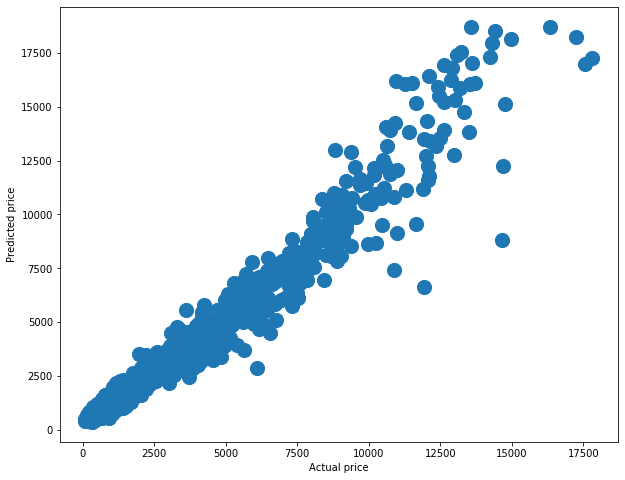

In [49]:
plt.figure(figsize=(10, 8))

plt.scatter(y_pred, y_test.values, s=200)

plt.xlabel('Actual price')
plt.ylabel('Predicted price')

plt.show()